# Лабораторная работа №1

## Выполнила: Коваленко Мария гр. 932001
### Вариант Чёт

In [1887]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

# <b>Бинарный Классификатор</b>


In [1888]:
# Загрузка данных из файла CSV
data = pd.read_csv('bank-additional.csv')

In [1889]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [1890]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1891]:
print(f"Размерность: {data.shape}")

Размерность: (4119, 21)


In [1892]:

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [1893]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [1894]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [1895]:
print(f"job: {data['job'].unique()}")
print(f"marital: {data['marital'].unique()}")
print(f"education: {data['education'].unique()}")
print(f"default: {data['default'].unique()}")
print(f"housing: {data['housing'].unique()}")
print(f"contact: {data['contact'].unique()}")
print(f"month: {data['month'].unique()}")
print(f"day_of_week {data['day_of_week'].unique()}")
print(f"campaign: {data['campaign'].unique()}")
print(f"month: {data['month'].unique()}")
print(f"day_of_week {data['day_of_week'].unique()}")
print(f"poutcome {data['poutcome'].unique()}")
print(f"loan {data['loan'].unique()}")
print(f"poutcome {data['poutcome'].unique()}")

job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['yes' 'no' 'unknown']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
campaign: [ 2  4  1  3  6  7 27  5 12 14 10  8 11 13  9 15 16 18 17 22 19 23 24 35
 29]
month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
loan ['no' 'unknown' 'yes']
poutcome ['nonexistent' 'failure' 'success']


In [1896]:
data1=pd.get_dummies (data, columns=['marital','education','job','month','day_of_week'] )

In [1897]:
default_dict={'no':0, 'yes':1,'unknown':0}
data1['default']=data1['default'].map(default_dict)

poutcome_dict={'nonexistent':0, 'success':1,'failure':0}
data1['poutcome']=data1['poutcome'].map(poutcome_dict)

housing_dict={'no':0, 'yes':1,'unknown':0}
data1['housing']=data1['housing'].map(housing_dict)

loan_dict={'no':0, 'yes':1,'unknown':0}
data1['loan']=data1['loan'].map(loan_dict)

In [1898]:
y_dict = {'yes':1,'no':0}
data1['binY'] = data1['y'].map(y_dict)

In [1899]:
data1[['y','binY']].head(5)

,y,binY
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [1900]:
data1['binY'].value_counts()

0    3668
1     451
Name: binY, dtype: int64

In [1901]:

X = data1.drop(['contact','binY','y'],axis=1)
y = data1['binY']  # Целевая переменная 'binY'

In [1902]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [1903]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)

In [1904]:
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (2636, 53)
Validation : (659, 53)
Test : (824, 53)


### <b>Создание и обучение нейронной сети</b>

#### Первая модель

In [1905]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
bin_model = Sequential([
    layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

In [1906]:
bin_model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 4)                 216       
                                                                 
 dense_165 (Dense)           (None, 1)                 5         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1907]:
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [1908]:
history = bin_model.fit(X_train, y_train, epochs=90, batch_size=9, validation_data=(X_val, y_val))
history_dict = history.history

Epoch 1/90
293/293 [==============================] - 2s 3ms/step - loss: 0.3966 - accuracy: 0.8813 - val_loss: 0.3256 - val_accuracy: 0.8907
Epoch 2/90
293/293 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8904 - val_loss: 0.3129 - val_accuracy: 0.8907
Epoch 3/90
293/293 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8911 - val_loss: 0.3031 - val_accuracy: 0.8938
Epoch 4/90
293/293 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8953 - val_loss: 0.2958 - val_accuracy: 0.8923
Epoch 5/90
293/293 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.9017 - val_loss: 0.2923 - val_accuracy: 0.8923
Epoch 6/90
293/293 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9044 - val_loss: 0.2896 - val_accuracy: 0.8953
Epoch 7/90
293/293 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9025 - val_loss: 0.2863 - val_accuracy: 0.8953
Epoch 

293/293 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9256 - val_loss: 0.2493 - val_accuracy: 0.8907
Epoch 59/90
293/293 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9245 - val_loss: 0.2519 - val_accuracy: 0.8907
Epoch 60/90
293/293 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9253 - val_loss: 0.2524 - val_accuracy: 0.8923
Epoch 61/90
293/293 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9275 - val_loss: 0.2518 - val_accuracy: 0.8923
Epoch 62/90
293/293 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9275 - val_loss: 0.2524 - val_accuracy: 0.8938
Epoch 63/90
293/293 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9272 - val_loss: 0.2549 - val_accuracy: 0.8953
Epoch 64/90
293/293 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9272 - val_loss: 0.2535 - val_accuracy: 0.8968
Epoch 65/90

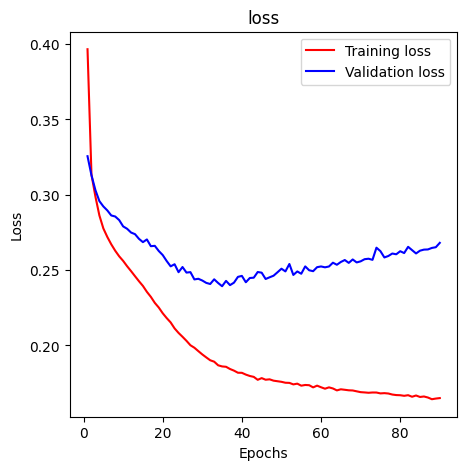

In [1909]:

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values,  label='Training loss', color="red")
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


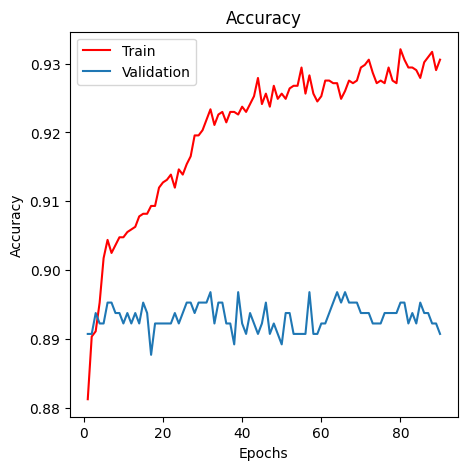

In [1910]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values,  label='Train', color="red")
plt.plot(epochs, val_acc_values,  label='Validation')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1911]:
bin_model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8981


[0.2374182641506195, 0.8980582356452942]

In [1912]:
x_ex = X_test[3,:]
y_pred=bin_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(10))

1/1 [==============================] - 0s 61ms/step
[0.43866286]
815     0
1281    0
1415    0
2082    1
45      0
1793    1
164     0
762     0
4055    0
734     0
Name: binY, dtype: int64


In [1913]:
x_ex = X_test[5,:]
y_pred=bin_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(10))

1/1 [==============================] - 0s 22ms/step
[0.9427273]
815     0
1281    0
1415    0
2082    1
45      0
1793    1
164     0
762     0
4055    0
734     0
Name: binY, dtype: int64


In [ ]:
from sklearn.metrics import recall_score , precision_score, balanced_accuracy_score, roc_auc_score
y_prob = bin_model.predict(X_test)  # Получение вероятностей
y_pred = (y_prob > 0.5).astype(int)  # Преобразование вероятностей в бинарные предсказания

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")
print(f"AUC: {auc:.2f}")



In [1914]:
probs = bin_model.predict(X_test)[:,0]
truth = y_test

26/26 [==============================] - 0s 1ms/step


In [1915]:
preds = (probs>0.5).astype(int)


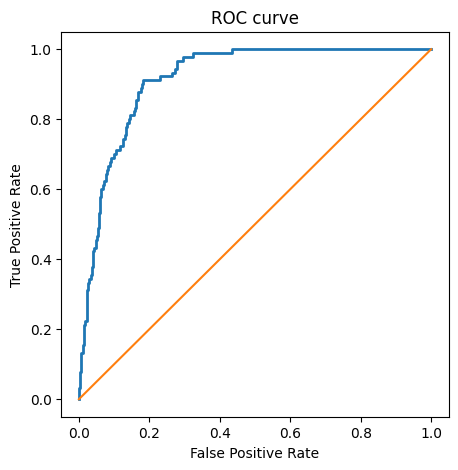

In [1918]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(truth, probs, pos_label=1)
lw = 2
plt.rcParams['figure.figsize']=(5,5)
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

#### Second Model

In [1829]:
bin_model_2 = Sequential([
   layers.Dense(32, activation = 'relu', input_dim = X_train.shape[1]),
        layers.Dense(16, activation = 'softmax'),
        layers.Dense(1, activation = 'sigmoid')
])

In [1830]:
bin_model_2.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 32)                1728      
                                                                 
 dense_162 (Dense)           (None, 16)                528       
                                                                 
 dense_163 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1831]:
bin_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [1832]:
history = bin_model_2.fit(X_train, y_train, epochs=90, batch_size=9, validation_data=(X_val, y_val))
history_dict = history.history

Epoch 1/90
293/293 [==============================] - 3s 5ms/step - loss: 0.4811 - accuracy: 0.8904 - val_loss: 0.3958 - val_accuracy: 0.8907
Epoch 2/90
293/293 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8904 - val_loss: 0.3445 - val_accuracy: 0.8907
Epoch 3/90
293/293 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8904 - val_loss: 0.3175 - val_accuracy: 0.8907
Epoch 4/90
293/293 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.8904 - val_loss: 0.3047 - val_accuracy: 0.8907
Epoch 5/90
293/293 [==============================] - 1s 4ms/step - loss: 0.2868 - accuracy: 0.8904 - val_loss: 0.2944 - val_accuracy: 0.8907
Epoch 6/90
293/293 [==============================] - 1s 4ms/step - loss: 0.2733 - accuracy: 0.8945 - val_loss: 0.2892 - val_accuracy: 0.8938
Epoch 7/90
293/293 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.9029 - val_loss: 0.2843 - val_accuracy: 0.8953
Epoch 

293/293 [==============================] - 1s 4ms/step - loss: 0.0831 - accuracy: 0.9712 - val_loss: 0.2891 - val_accuracy: 0.8998
Epoch 59/90
293/293 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9708 - val_loss: 0.2925 - val_accuracy: 0.8983
Epoch 60/90
293/293 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9719 - val_loss: 0.3018 - val_accuracy: 0.8998
Epoch 61/90
293/293 [==============================] - 1s 4ms/step - loss: 0.0772 - accuracy: 0.9742 - val_loss: 0.2963 - val_accuracy: 0.9074
Epoch 62/90
293/293 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9746 - val_loss: 0.2931 - val_accuracy: 0.8968
Epoch 63/90
293/293 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9738 - val_loss: 0.3034 - val_accuracy: 0.9014
Epoch 64/90
293/293 [==============================] - 1s 3ms/step - loss: 0.0742 - accuracy: 0.9757 - val_loss: 0.3049 - val_accuracy: 0.8892
Epoch 65/90

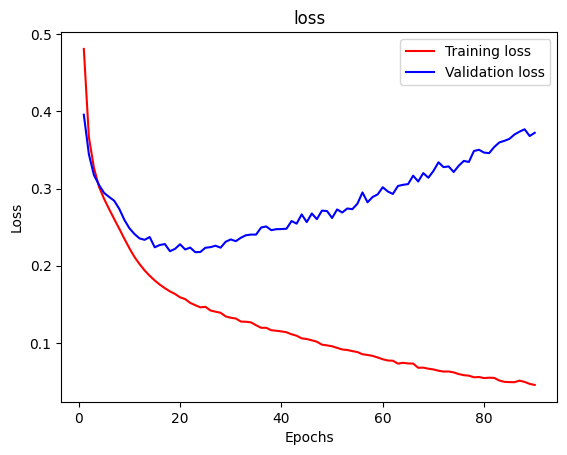

In [1833]:

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values,  label='Training loss', color="red")
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


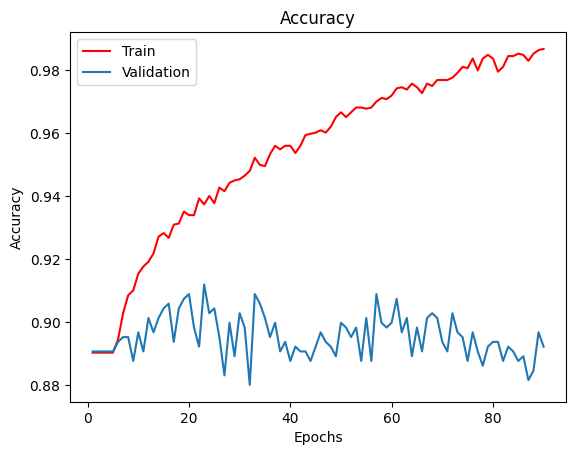

In [1834]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values,  label='Train', color="red")
plt.plot(epochs, val_acc_values,  label='Validation')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1835]:
y_prob = bin_model_2.predict(X_test)  # Получение вероятностей
y_pred = (y_prob > 0.5).astype(int)  # Преобразование вероятностей в бинарные предсказания

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")
print(f"AUC: {auc:.2f}")



26/26 [==============================] - 0s 2ms/step
Recall: 0.90
Precision: 0.90
Weighted Accuracy: 0.90
AUC: 0.75


# **Многоклассовый классификатор**

In [2047]:
# Загрузка данных из файла CSV
data2 = pd.read_csv('fetal_health.csv')

In [2048]:
print(f"Размерность: {data2.shape}")

Размерность: (2126, 22)


In [2049]:
data2 = pd.read_csv('fetal_health.csv')
data2.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2050]:
data2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [2051]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [2052]:
data2.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Разделим данные на обучающую, тестовую и валидационную выборки

In [2053]:
print(f"fetal_health {data2['fetal_health'].unique()}")

fetal_health [2. 1. 3.]


In [2054]:

X = data2.drop(['fetal_health'], axis=1)
y = data2['fetal_health']

In [2055]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [2056]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2,random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (1360, 21)
Validation : (340, 21)
Test : (426, 21)


In [2057]:
y_train

248     1.0
165     1.0
545     2.0
1141    1.0
457     1.0
       ... 
1371    2.0
1031    1.0
1968    1.0
1030    1.0
1054    1.0
Name: fetal_health, Length: 1360, dtype: float64

In [2058]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [2059]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [2060]:
multi_model = Sequential()
multi_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
multi_model.add(Dense(16, activation='selu'))
multi_model.add(Dense(8, activation='selu'))
multi_model.add(Dense(4, activation='softmax'))

In [2061]:
multi_model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics='accuracy')


In [2062]:
history = multi_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=5)
history_dict3 = history.history

Epoch 1/50
272/272 [==============================] - 2s 3ms/step - loss: 0.7921 - accuracy: 0.7199 - val_loss: 0.6022 - val_accuracy: 0.7794
Epoch 2/50
272/272 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7794 - val_loss: 0.5350 - val_accuracy: 0.7794
Epoch 3/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5028 - accuracy: 0.7904 - val_loss: 0.4696 - val_accuracy: 0.7941
Epoch 4/50
272/272 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8272 - val_loss: 0.4149 - val_accuracy: 0.8441
Epoch 5/50
272/272 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8485 - val_loss: 0.3811 - val_accuracy: 0.8824
Epoch 6/50
272/272 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8632 - val_loss: 0.3363 - val_accuracy: 0.8794
Epoch 7/50
272/272 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8728 - val_loss: 0.3140 - val_accuracy: 0.8853
Epoch 

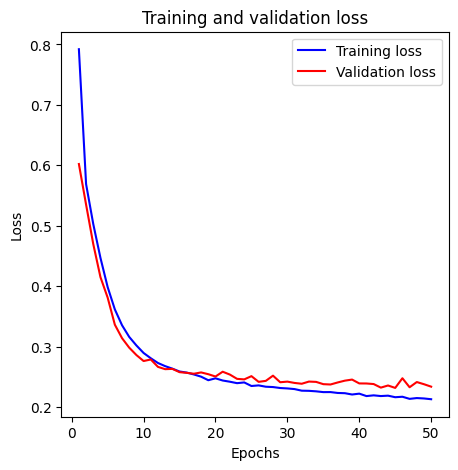

In [2063]:
loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

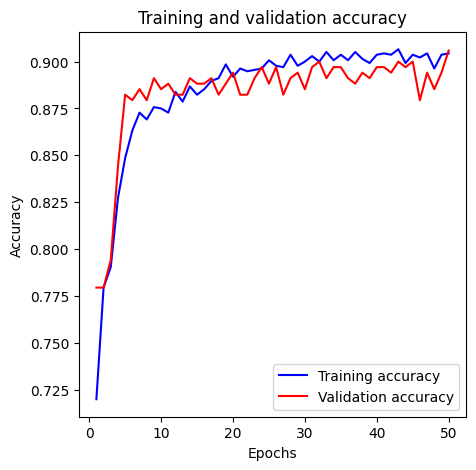

In [2064]:
plt.clf()
acc_values = history_dict3['accuracy']
val_acc_values = history_dict3['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2065]:
print(y_test[4])

[0. 0. 0. 1.]


In [2066]:
x_ex = X_test[4,:]
y1 = min_max_scaler.inverse_transform(x_ex.reshape(1, -1))
print(y1)
y_pred=multi_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

[[1.52e+02 0.00e+00 0.00e+00 2.00e-03 0.00e+00 0.00e+00 0.00e+00 6.10e+01
  4.00e-01 7.40e+01 6.70e+00 4.10e+01 1.23e+02 1.64e+02 4.00e+00 0.00e+00
  1.60e+02 1.58e+02 1.60e+02 1.00e+00 1.00e+00]]
1/1 [==============================] - 0s 71ms/step
[4.8805896e-07 6.6216566e-02 8.9203101e-01 4.1751932e-02]


In [2067]:
y_pred = multi_model.predict(X_test)
print(y_pred)

14/14 [==============================] - 0s 2ms/step
[[1.9111500e-10 9.9994791e-01 5.1531006e-05 5.6100811e-07]
 [4.0852068e-11 9.9993777e-01 6.1766266e-05 4.7768839e-07]
 [2.1284538e-06 6.2705356e-01 3.6565477e-01 7.2896322e-03]
 ...
 [1.6063661e-08 9.9865109e-01 1.2444376e-03 1.0446985e-04]
 [6.8657222e-08 9.6910119e-01 3.0609852e-02 2.8886524e-04]
 [8.3026469e-10 9.9951601e-01 4.8035916e-04 3.6249862e-06]]


In [2068]:
y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [2069]:
from sklearn.metrics import recall_score

# Преобразуйте вероятности в предсказанные метки (классы)
y_pred_classes = y_pred.argmax(axis=-1)

# Вычислите recall для каждого класса
recall_per_class1 = recall_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите precision для каждого класса
precision_per_class1 = precision_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите взвешенную точность
weighted_accuracy1 = accuracy_score(y_test.argmax(axis=-1), y_pred_classes)


print("Recall per class:", recall_per_class1)
print("Precision per class:", precision_per_class1)
print("Weighted Accuracy:", weighted_accuracy1)

Recall per class: [0.99096386 0.57627119 0.77142857]
Precision per class: [0.92156863 0.82926829 0.96428571]
Weighted Accuracy: 0.9154929577464789


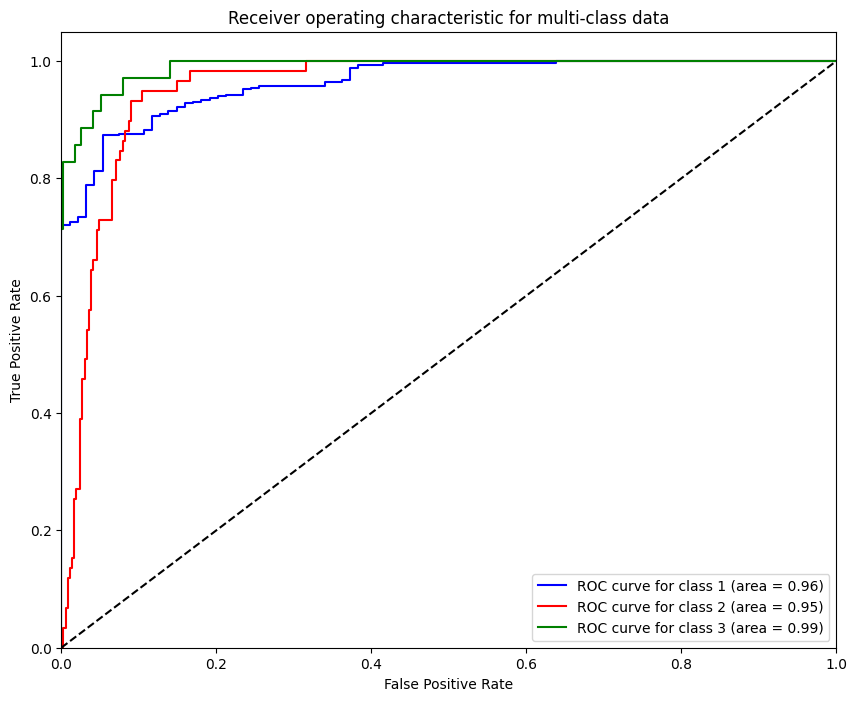

{1: 0.9640476800820302, 2: 0.9539555719761696, 3: 0.9895506028498355}


In [2070]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

auc_score = {}

for i in range(1, 4):
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train[:, i])    

    prob_test_vec = clf.predict_proba(X_test)
    
    fpr_i, tpr_i, _ = roc_curve(y_test[:, i], prob_test_vec[:, 1])
    auc_value = auc(fpr_i, tpr_i)
    
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc_value)

    auc_score[i] = auc_value

# Визуализируйте ROC-кривые для каждого класса
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(1, 4), colors):  
    plt.plot(fpr[i-1], tpr[i-1], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i-1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

print(auc_score)

Вторая модель:

In [2026]:
multi_model_2 = Sequential()
multi_model_2.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
multi_model_2.add(Dense(4, activation='softmax'))

In [2027]:
multi_model_2.compile(loss='categorical_crossentropy', optimizer='adamax', metrics='accuracy')


In [2028]:
history = multi_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=5)
history_dict4 = history.history

Epoch 1/50
272/272 [==============================] - 1s 2ms/step - loss: 0.8828 - accuracy: 0.7588 - val_loss: 0.7055 - val_accuracy: 0.7794
Epoch 2/50
272/272 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.7779 - val_loss: 0.6436 - val_accuracy: 0.7794
Epoch 3/50
272/272 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7779 - val_loss: 0.6072 - val_accuracy: 0.7794
Epoch 4/50
272/272 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7779 - val_loss: 0.5763 - val_accuracy: 0.7794
Epoch 5/50
272/272 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7779 - val_loss: 0.5458 - val_accuracy: 0.7794
Epoch 6/50
272/272 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7779 - val_loss: 0.5164 - val_accuracy: 0.7794
Epoch 7/50
272/272 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.7779 - val_loss: 0.4917 - val_accuracy: 0.7824
Epoch 

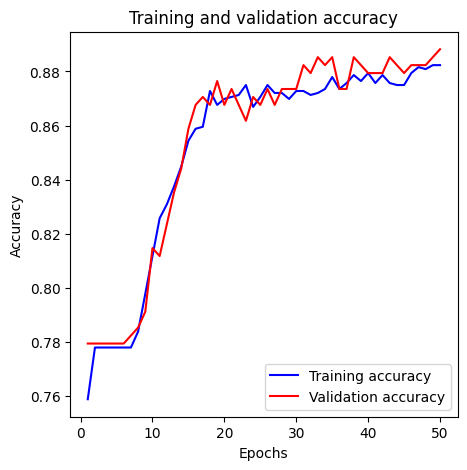

In [2029]:
plt.clf()
acc_values = history_dict4['accuracy']
val_acc_values = history_dict4['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

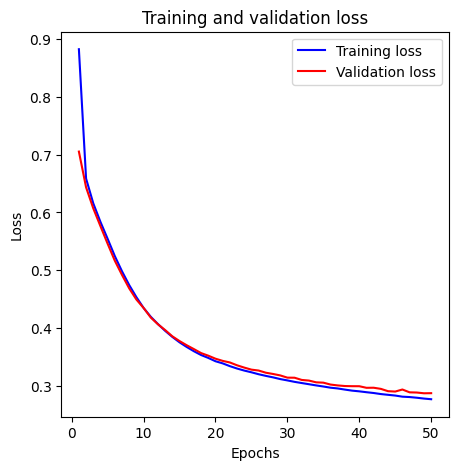

In [2030]:
loss_values = history_dict4['loss']
val_loss_values = history_dict4['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## <b>3. Оценка уровня потребления ресурсов домохозяйством.</b>
(Регрессор)

In [2071]:
# Загрузка данных из файла CSV
data3 = pd.read_csv('DS_2019_public.csv')
print(f"Размерность: {data3.shape}")

Размерность: (10875, 121)


In [2072]:
# Выделение первых 5 и последних 5 записей
first_5 = data3.head(5)

# Вывод первых 5 записей в виде красивой таблицы
print("Первые 5 записей:")
display(first_5.style)

Первые 5 записей:


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLFOSPH,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,DOLELSPH,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLNGWTH,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,CUFEETNGOTH,BTUNGOTH,KWHOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,CUFEETNGWTH,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793000,17,181.998000,620.979000,621,368,38606,0,8599.172010,2736,1,2,475,337.315000,376.643000,38605.955000,367.654000,70,2736,0.000000,1,1,0.000000,2,501,0,0,0.000000,0,0.000000,0.000000,0,0,400,1293,1,0.000000,0,838,85895,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,3136,2736,286.745000,0.000000,1,818,1,0,0,0,0,0,103460,1,0,0,0.000000,0.000000,0.000000,0.000000,4,0,0,0.000000,29653,0.000000,0.000000,2,0,3,31,0,0,0,0,1,0.000000,0.000000,2,0,167.601000,17179.073000,3655.782000,0.000000,287,0.000000,1,1998,12473.544000,5148,17565,0,293.756000,30109.973000,1,0,70,-2,30110,2,120.893000,121,4,0,1,1,1310.220000
1,1,1,1,48.901000,49,184.459000,629.389000,629,582,40248,-2,8969.915921,528,1,1,588,296.353000,392.662000,40248.226000,581.517000,68,264,0.000000,1,1,0.000000,1,339,0,0,0.000000,0,0.000000,0.000000,0,0,0,1327,1,0.000000,-2,499,51148,0.000000,0.000000,1,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,264,528,528,114.618000,0.000000,1,739,1,0,0,0,1,0,58716,2,0,0,0.000000,0.000000,0.000000,0.000000,2,0,0,0.000000,6781,0.000000,0.000000,1,0,2,-2,0,0,2,0,1,0.000000,0.000000,1,0,28.944000,2966.796000,1117.878000,0.000000,115,0.000000,1,1965,3814.291000,2218,7568,0,77.394000,7932.978000,1,0,60,2,7933,-2,242.746000,243,2,0,1,-2,915.664000
2,1,3,7,101.048000,101,1063.022000,3627.013000,3627,425,40196,0,18003.639600,1623,1,2,952,512.731000,392.152000,40195.580000,424.514000,55,1623,0.000000,1,1,0.000000,6,534,0,0,0.000000,0,0.000000,0.000000,0,0,400,1398,1,0.000000,0,412,42230,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,2023,1623,0.000000,0.000000,1,446,1,0,0,0,1,0,76401,1,2,0,0.000000,179.424000,1887.531000,6440.221000,7,1,0,0.000000,20438,0.000000,0.000000,2,1,3,10,0,0,0,0,5,0.000000,0.000000,5,0,19.848000,2034.420000,5393.913000,0.000000,179,0.000000,1,1985,18403.933000,10015,34171,0,0.000000,0.000000,0,0,55,-2,6440,5,158.797000,159,7,0,1,5,1670.534000
3,1,1,1,0.000000,0,0.000000,0.000000,0,616,36136,1,5999.605242,1274,1,2,705,619.862000,352.549000,36136.283000,616.238000,70,0,0.000000,0,0,0.000000,2,620,0,0,0.000000,0,0.000000,0.000000,0,0,637,1558,1,0.000000,0,488,50020,0.000000,0.000000,2,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1912,1912,1912,236.762000,0.000000,1,853,1,0,0,0,0,0,59809,-2,1,0,0.000000,0.000000,0.000000,0.000000,5,0,0,0.000000,8607,0.000000,0.000000,1,0,3,20,0,0,2,0,1,0.000000,0.000000,2,0,0.000000,0.000000,2522.532000,0.000000,237,0.000000,1,1983,8606.856000,2869,9789,0,135.451000,13883.717000,1,0,70,2,13884,5,85.138000,85,5,0,1,5,346.468000
4,1,4,10,45.132000,45,274.530000,936.677000,937,685,74100,1,4232.486778,3485,1,2,1050,853.549000,722.927000,74100.451000,685.300000,66,1538,0.000000,1,1,0.000000,4,893,0,0,0.000000,0,0.000000,0.000000,0,0,0,1906,1,0.000000,0,903,92558,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1946,3485,

In [2073]:
data3.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10805.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10874.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,203.660740,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,...,0.818115,16313.564138,3.675126,154.368463,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,311.314608,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,...,2.346643,13733.416871,2.775507,106.987575,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,19.360000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,...,0.000000,7708.000000,2.000000,86.225000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.634000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,...,0.000000,12761.000000,5.000000,126.911500,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,264.344000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,...,2.000000,21169.500000,5.000000,192.755250,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.265000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,...,40.000000,284130.000000,8.000000,2490.046000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [2074]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(42), int64(79)
memory usage: 10.0 MB


In [2075]:
data3.isna().sum()

Climate_Region_Pub     0
DIVISION               0
REPORTABLE_DOMAIN      0
DOLELCOL              70
TOTALDOLCOL            0
                      ..
HEATROOM               0
WDWATER                0
UGWARM                 0
DRYRFUEL               0
KWHRFG                 0
Length: 121, dtype: int64

In [2083]:
data3 = data3.dropna()

In [2084]:
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data3.drop(['TOTALBTUCOL'], axis=1)  # Признаки, за исключением целевой переменной TOTALBTUCOL
y = data3['TOTALBTUCOL']  # Целевая переменная TOTALBTUCOL

In [2085]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [2086]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (6902, 120)
Validation : (1726, 120)
Test : (2157, 120)


In [2087]:
reg_model = Sequential()
reg_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
reg_model.add(Dense(32,activation='relu'))
reg_model.add(Dense(1))

In [2088]:
reg_model.summary()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 64)                7744      
                                                                 
 dense_211 (Dense)           (None, 32)                2080      
                                                                 
 dense_212 (Dense)           (None, 1)                 33        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2089]:
reg_model.compile(loss='mse', optimizer='adam', metrics='mae')

In [2090]:
history = reg_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=20)
history_dict = history.history

Epoch 1/100
346/346 [==============================] - 2s 3ms/step - loss: 97542608.0000 - mae: 5420.9990 - val_loss: 71657080.0000 - val_mae: 4820.3628
Epoch 2/100
346/346 [==============================] - 1s 2ms/step - loss: 66488056.0000 - mae: 5164.0439 - val_loss: 58628576.0000 - val_mae: 5360.6870
Epoch 3/100
346/346 [==============================] - 1s 2ms/step - loss: 60708592.0000 - mae: 5181.4419 - val_loss: 53903548.0000 - val_mae: 4851.1445
Epoch 4/100
346/346 [==============================] - 1s 2ms/step - loss: 55782596.0000 - mae: 4801.9771 - val_loss: 48850856.0000 - val_mae: 4605.6821
Epoch 5/100
346/346 [==============================] - 1s 2ms/step - loss: 50344192.0000 - mae: 4458.6631 - val_loss: 43725708.0000 - val_mae: 4299.9692
Epoch 6/100
346/346 [==============================] - 1s 2ms/step - loss: 45056728.0000 - mae: 4160.5454 - val_loss: 38950496.0000 - val_mae: 3934.4585
Epoch 7/100
346/346 [==============================] - 1s 2ms/step - loss: 4024873

Epoch 55/100
346/346 [==============================] - 1s 2ms/step - loss: 1046814.4375 - mae: 647.2445 - val_loss: 997079.7500 - val_mae: 642.7020
Epoch 56/100
346/346 [==============================] - 1s 2ms/step - loss: 978876.5000 - mae: 628.3691 - val_loss: 939900.7500 - val_mae: 623.6893
Epoch 57/100
346/346 [==============================] - 1s 2ms/step - loss: 910729.8125 - mae: 606.1825 - val_loss: 876070.6875 - val_mae: 600.2345
Epoch 58/100
346/346 [==============================] - 1s 2ms/step - loss: 866398.1875 - mae: 590.5306 - val_loss: 801925.6875 - val_mae: 572.9054
Epoch 59/100
346/346 [==============================] - 1s 2ms/step - loss: 789323.3750 - mae: 563.7395 - val_loss: 796725.7500 - val_mae: 574.8430
Epoch 60/100
346/346 [==============================] - 1s 2ms/step - loss: 746602.6875 - mae: 547.3757 - val_loss: 702977.5000 - val_mae: 533.4579
Epoch 61/100
346/346 [==============================] - 1s 2ms/step - loss: 692476.5000 - mae: 523.3832 - val_l

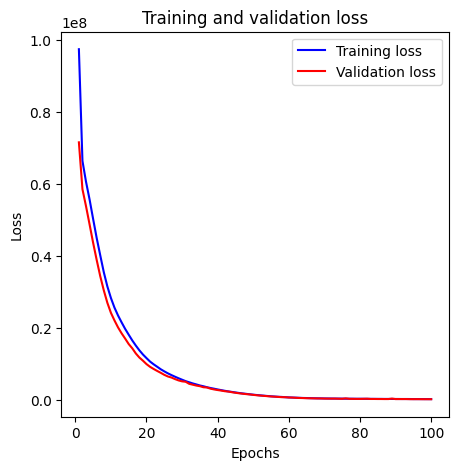

In [2091]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

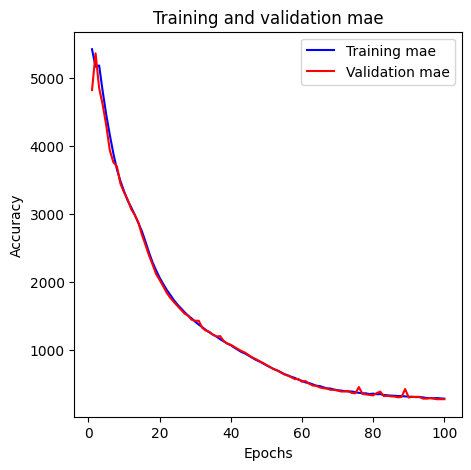

In [2092]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2093]:
reg_model.evaluate(X_test, y_test)

68/68 [==============================] - 0s 1ms/step - loss: 265273.6562 - mae: 285.5303


[265273.65625, 285.53033447265625]

In [2094]:
y_test

8955      4607
10088      527
4729      2150
5731         0
3708       249
         ...  
9796         0
8969         0
638       1857
2628     17724
7329      3174
Name: TOTALBTUCOL, Length: 2157, dtype: int64

In [2095]:
x_ex = X_test[1,:]
y_pred=reg_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 60ms/step
[410.337]


In [2096]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse1 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse1}')

# Вычисление MAE
mae1 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae1}')

# Вычисление R^2
r2_1 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_1}')

68/68 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 265273.70709087927
Mean Absolute Error (MAE): 285.53046855978465
R-squared (R^2): 0.9962764973871336


In [2098]:
reg_model2 = Sequential()
reg_model2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
reg_model2.add(Dense(32,activation='relu'))
reg_model2.add(Dense(1,activation='linear'))


In [2099]:
reg_model2.summary()

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 64)                7744      
                                                                 
 dense_217 (Dense)           (None, 32)                2080      
                                                                 
 dense_218 (Dense)           (None, 1)                 33        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2100]:
reg_model2.compile(loss='mse', optimizer='adam', metrics='mae')

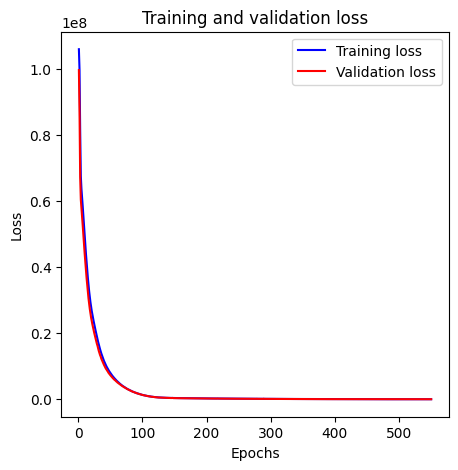

In [2102]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

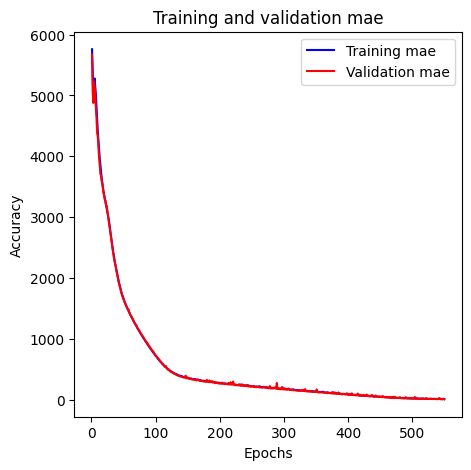

In [2103]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2104]:
reg_model2.evaluate(X_test, y_test)

68/68 [==============================] - 0s 1ms/step - loss: 361.8265 - mae: 9.1906


[361.8265380859375, 9.190591812133789]

In [2105]:
y_test

8955      4607
10088      527
4729      2150
5731         0
3708       249
         ...  
9796         0
8969         0
638       1857
2628     17724
7329      3174
Name: TOTALBTUCOL, Length: 2157, dtype: int64

In [2106]:
x_ex = X_test[1,:]
y_pred=reg_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 51ms/step
[495.8974]


In [2107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model2.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse2 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse2}')

# Вычисление MAE
mae2 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae2}')

# Вычисление R^2
r2_2 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_2}')

68/68 [==============================] - 0s 855us/step
Mean Squared Error (MSE): 361.8228018430544
Mean Absolute Error (MAE): 9.190595410297908
R-squared (R^2): 0.9999949212903049


Model Evaluation Results:
  Metric        Model 1     Model 2
0    MSE  265273.707091  361.822802
1    MAE     285.530469    9.190595
2    R^2       0.996276    0.999995


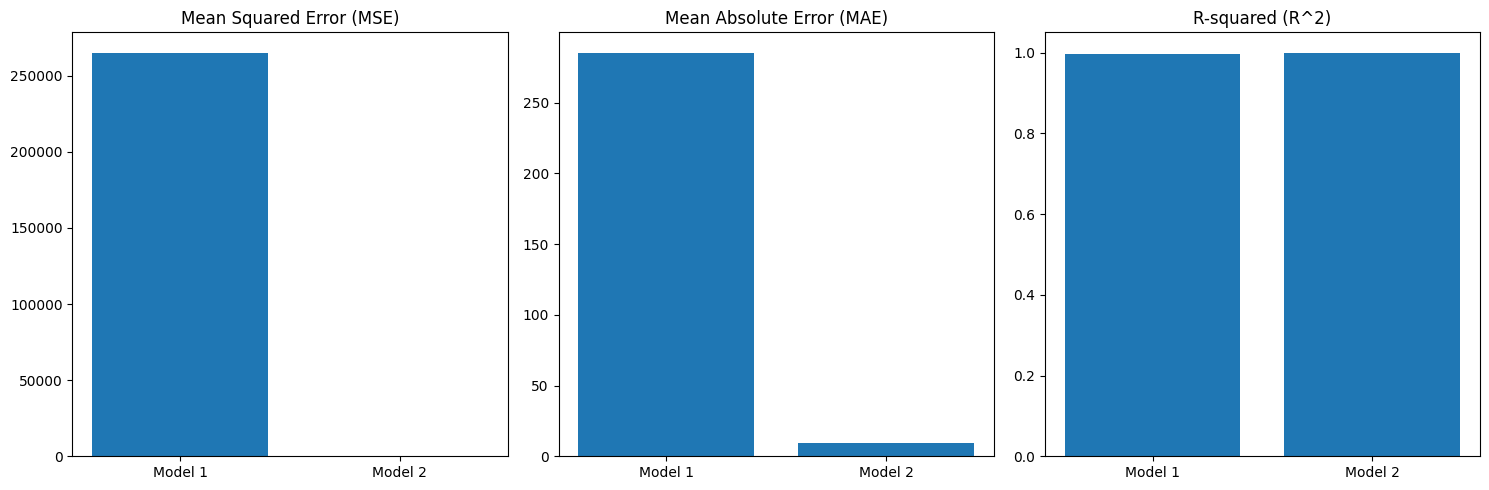

In [2109]:
# Создание DataFrame для отображения результатов
results = pd.DataFrame({'Metric': ['MSE', 'MAE', 'R^2'],
                        'Model 1': [mse1, mae1, r2_1],
                        'Model 2': [mse2, mae2, r2_2]})

mse = [mse1, mse2]
mae = [mae1, mae2]
r2 = [r2_1, r2_2]

colors = ['green', 'pink']
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(['Model 1', 'Model 2'], mse )
plt.title('Mean Squared Error (MSE)')

plt.subplot(132)
plt.bar(['Model 1', 'Model 2'], mae)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(133)
plt.bar(['Model 1', 'Model 2'], r2)
plt.title('R-squared (R^2)')

plt.tight_layout()

print("Model Evaluation Results:")
print(results)
plt.show()